In [1]:
import json
import os
from dataclasses import dataclass
import pandas as pd
from random import sample
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

In [2]:
def read_stats(path):
    result = []
    for file in os.listdir(path):
        with open(os.path.join(path, file), "r") as f:
            stats = json.load(f)
        result.extend(stats)
    return result

In [26]:
stats = read_stats("/home/andrew/Documents/study/thesis/thesis-src/experiments/training/V6_0__Train_no_kde_network/stats")

In [27]:
@dataclass
class Record:
    epoch: int
    query_id: int
    neighbour_id: int
    n_idx: int
    similarity: int
    density: int
    softmax: int
    
def process_stats(stats):
    result = []
    for record in stats:
        epoch = record["epoch"]
        query_id = record["query_id"]
        
        for i, n_id in enumerate(record["neighbours_id"]):
            similarity = record["weights"][i]
            if record['density'] is not None:
                density = record["density"][i]
            else:
                density = record["density"]
            softmax = np.exp(record["softmax"][i])
            result.append(Record(epoch, query_id, n_id, i, similarity, density, softmax))
    return result



In [28]:
new_stats = process_stats(stats)

In [29]:
df = pd.DataFrame(new_stats)

In [35]:
query_id_sample = sample(df.query_id.unique().tolist(),10)

In [36]:
subset=df[df.query_id.isin(query_id_sample)]
subset = subset[subset.epoch<=4]

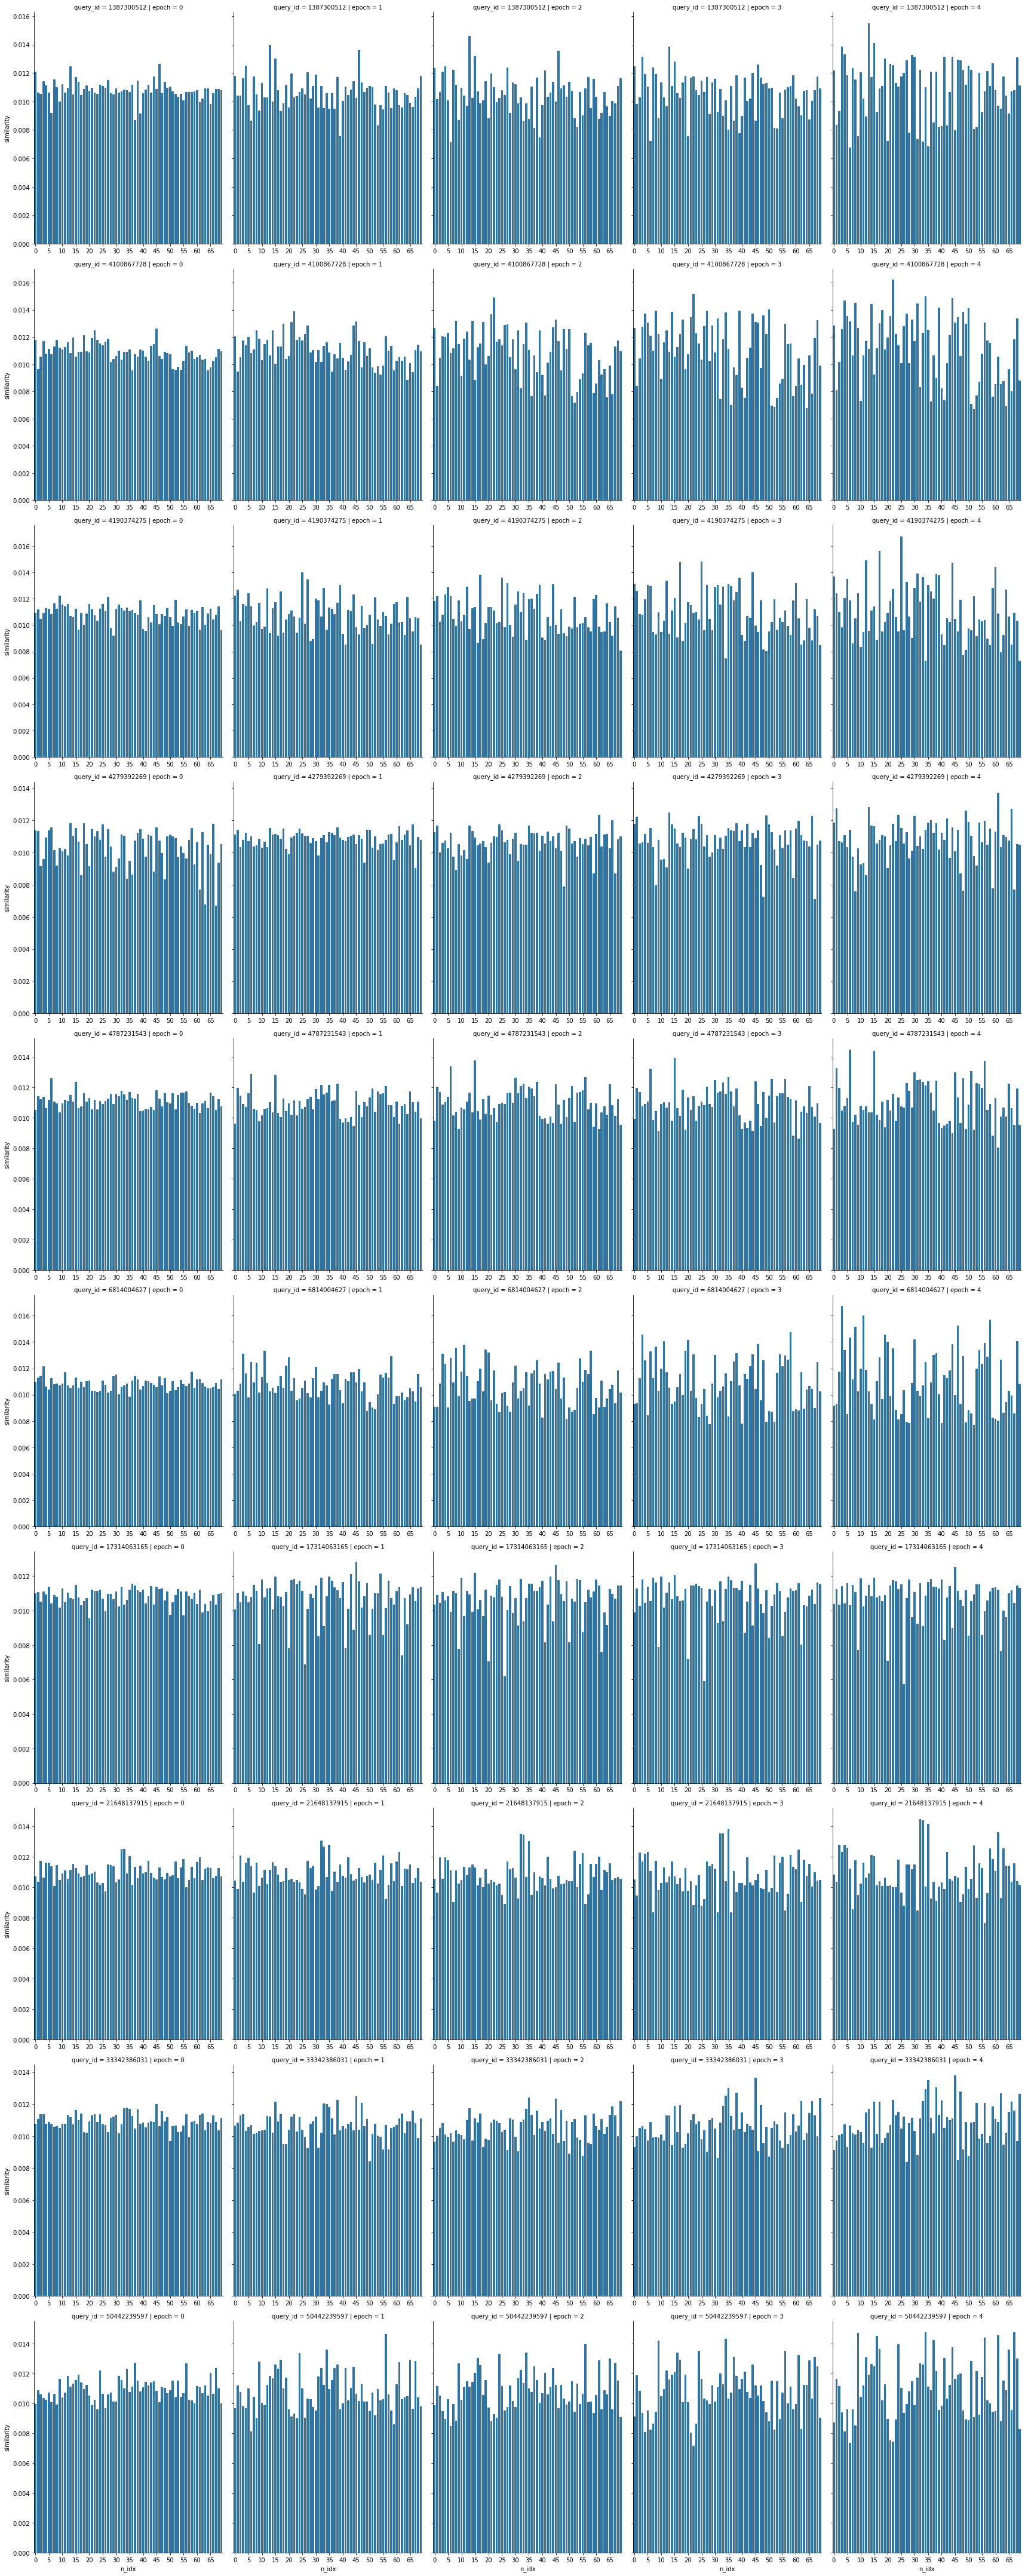

In [37]:
g=sns.FacetGrid(data=subset, row="query_id", col="epoch", sharex=False, sharey="row", height=6, aspect=0.8)
g.map_dataframe(sns.barplot, x="n_idx", y="similarity")

for ax in g.axes.flat:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

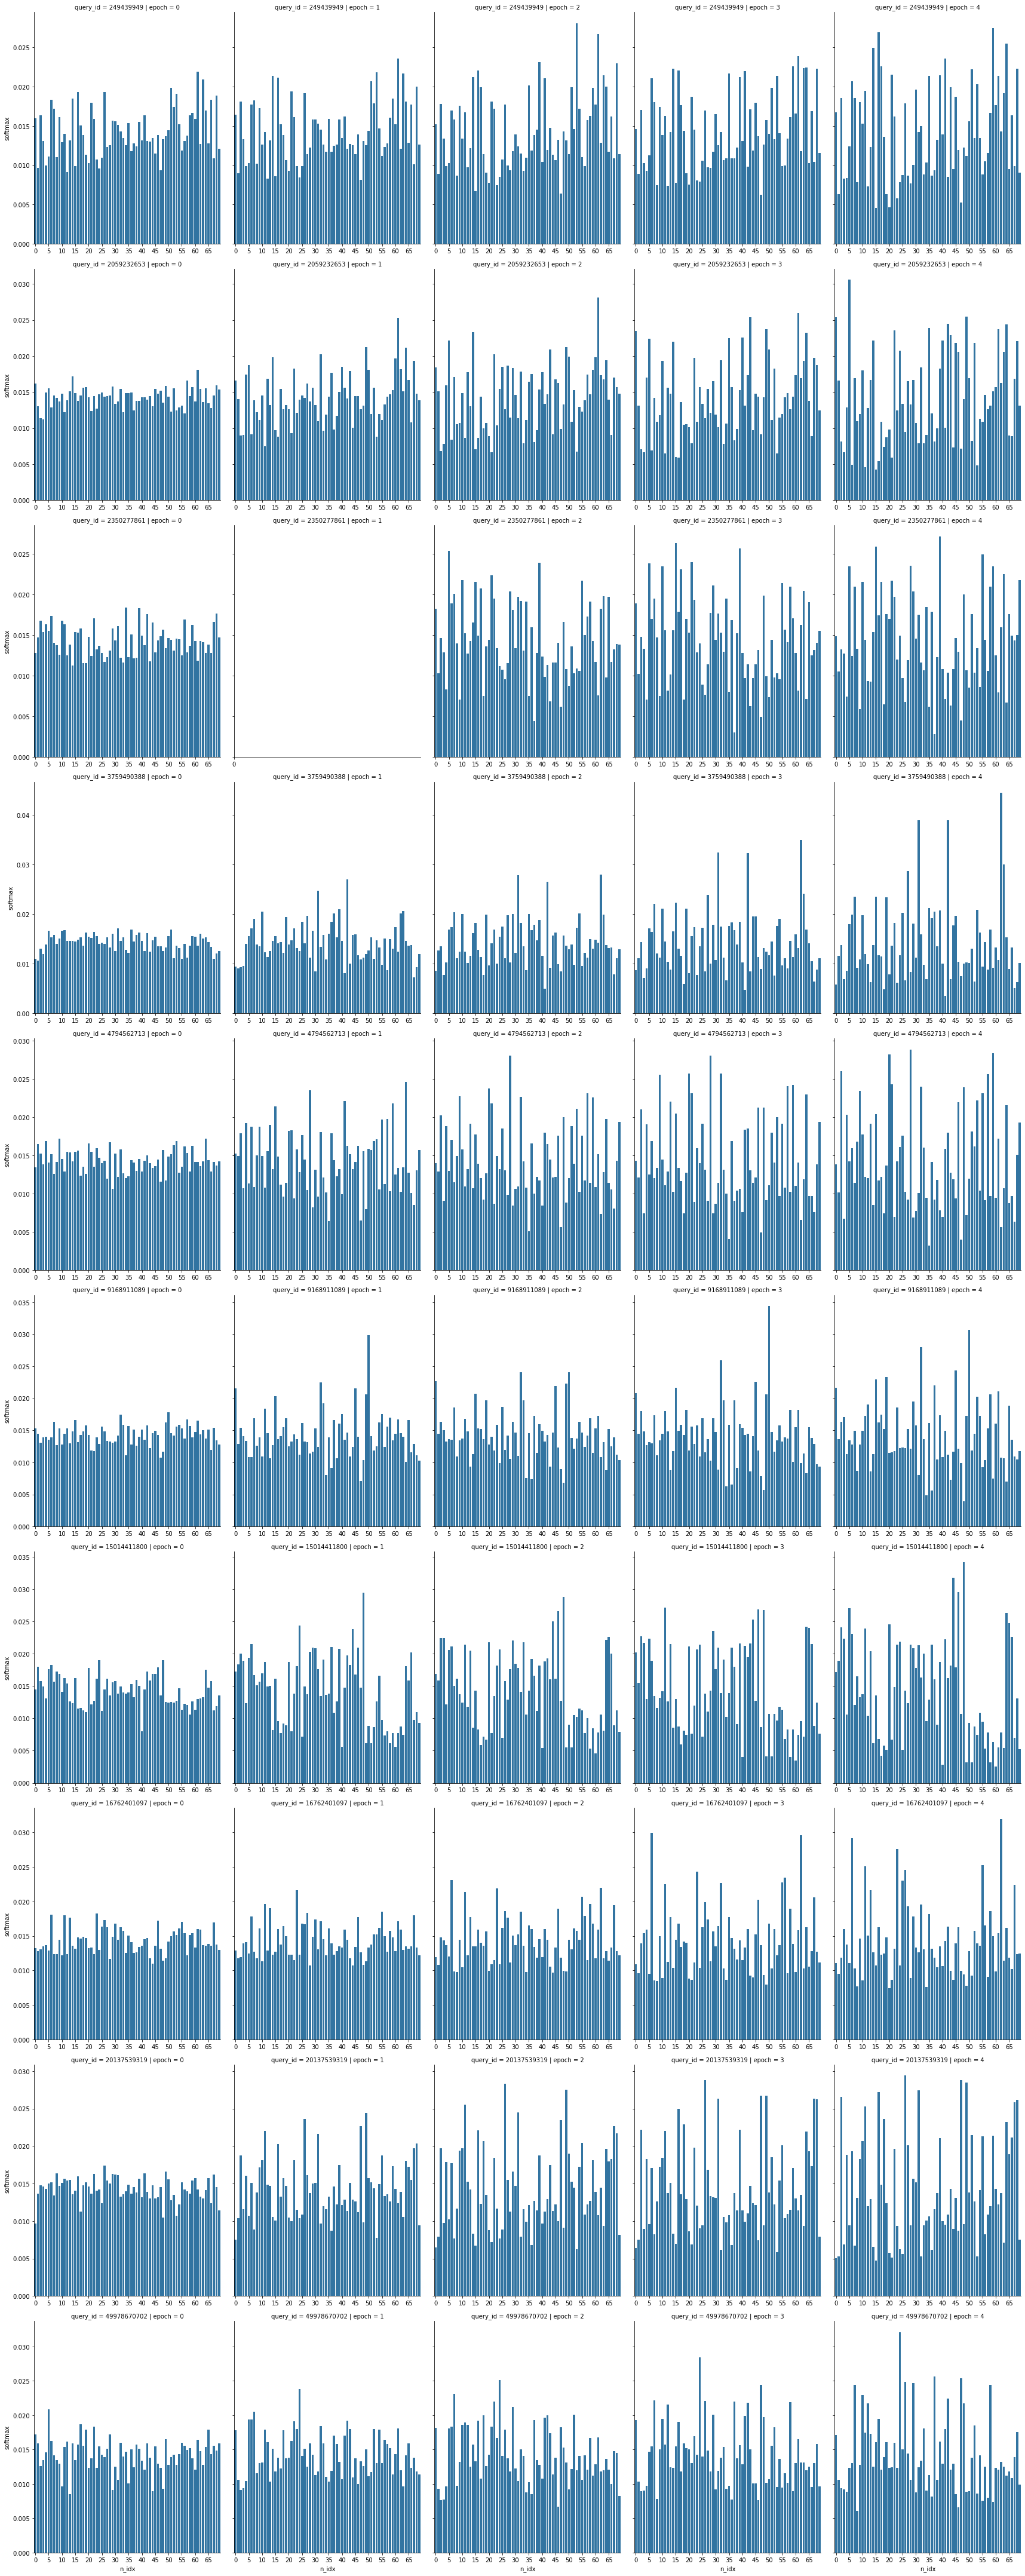

In [34]:
g=sns.FacetGrid(data=subset, row="query_id", col="epoch", sharex=False, sharey="row", height=6, aspect=0.8)
g.map_dataframe(sns.barplot, x="n_idx", y="softmax")

for ax in g.axes.flat:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

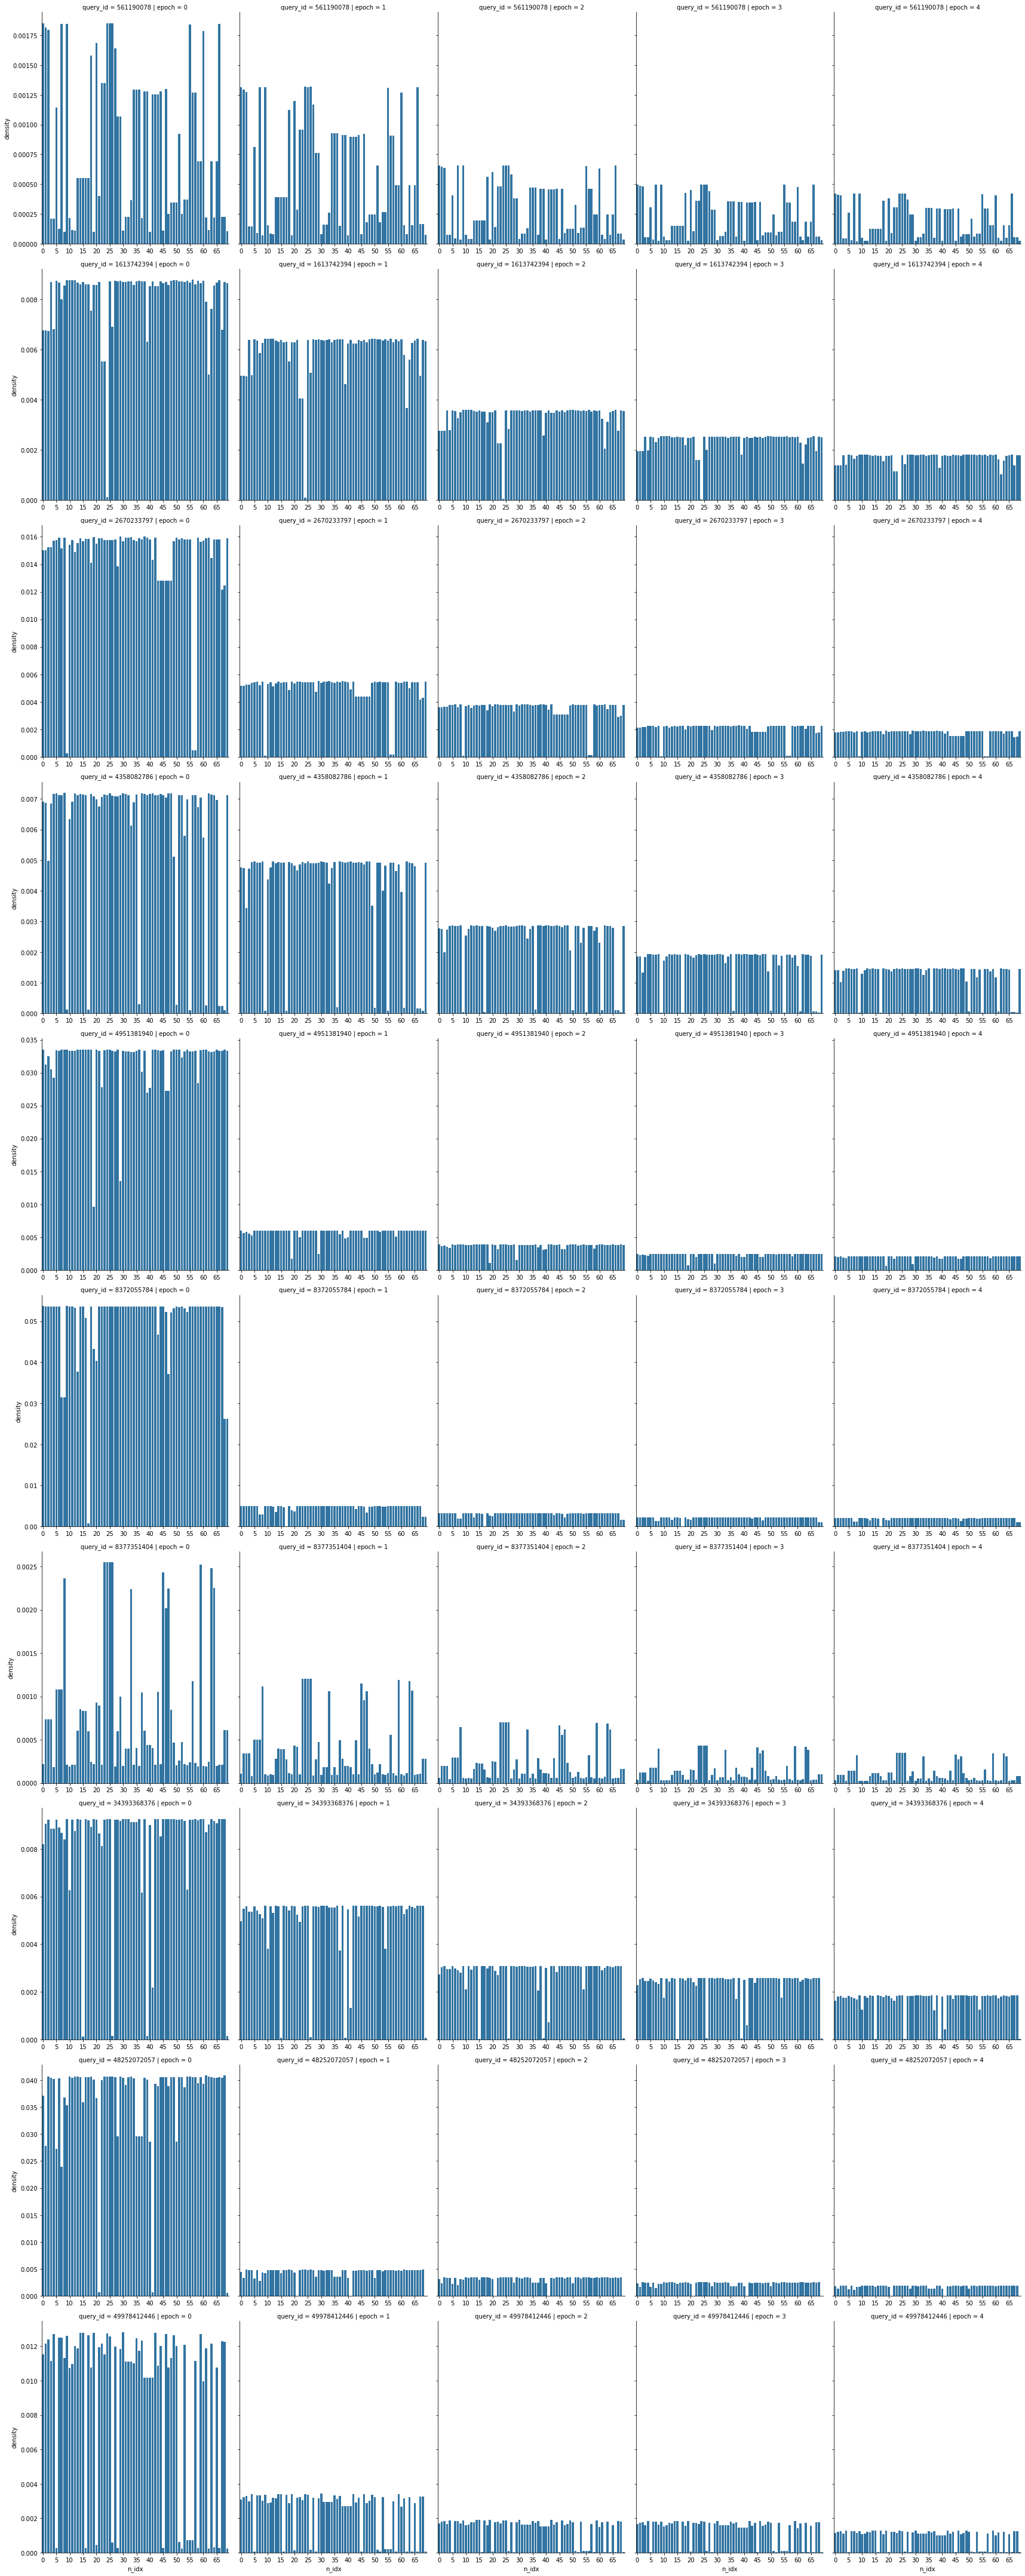

In [41]:
g=sns.FacetGrid(data=subset, row="query_id", col="epoch", sharex=False, sharey="row", height=6, aspect=0.8)
g.map_dataframe(sns.barplot, x="n_idx", y="density")

for ax in g.axes.flat:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())